## Loading Data

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.concat([X,y], axis = 1)

In [4]:
data = data[data['class'] != 3]

In [5]:
X = data.iloc[:,:13]

In [6]:
y = data['class']

In [7]:
y = y.map({1: 0, 2: 1})

## Loss on Default Logistic Regression Model

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error, log_loss
from sklearn.preprocessing import StandardScaler

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
clf=LogisticRegression(max_iter=500,penalty=None)
clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_test)[:, -1]
log_loss(y_test,y_pred)

0.0026099572770529305

In [21]:
Lstar = log_loss(y_test, y_pred)

## Models

In [33]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def coordinate_descent_lr(X, y, method='largest_gradient', num_iterations=100, learning_rate=0.01):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    losses = []

    for _ in range(num_iterations):
        for i in range(n_features):
            if method == 'random':
                i = np.random.randint(n_features)  # Random feature for random-feature coordinate descent
            else:
                y_pred = sigmoid(np.dot(X, w) + b)
                gradients = -np.dot(X.T, (y-y_pred)) / n_samples
                i = np.argmax(np.abs(gradients))
                
            feature = X[:, i]
            y_pred = sigmoid(np.dot(X, w) + b)

            # Gradient calculation
            grad_wi = -np.dot(feature, (y - y_pred)) / n_samples
            grad_b = -np.mean(y - y_pred)

            # Update weights
            w[i] -= learning_rate * grad_wi
            b -= learning_rate * grad_b

        # Record the loss after each full iteration over features
        losses.append(log_loss(y, sigmoid(np.dot(X, w) + b)))

    return w, b, losses

# Training the models
w_cd, b_cd, losses_cd = coordinate_descent_lr(X_train, y_train, method='largest_gradient')
y_pred_test_cd = sigmoid(np.dot(X_test, w_cd) + b_cd)
final_test_loss_cd = log_loss(y_test, y_pred_test_cd)
final_test_loss_cd

0.1988766748180303

In [34]:
w_cd, b_cd, losses_cd2 = coordinate_descent_lr(X_train, y_train, method='random')
y_pred_test_cd = sigmoid(np.dot(X_test, w_cd) + b_cd)
final_test_loss_cd = log_loss(y_test, y_pred_test_cd)
final_test_loss_cd

0.33938397660178227

In [13]:
losses2 = []
for i in range(100):
    w_cd, b_cd, losses_cd2 = coordinate_descent_lr(X_train, y_train, method='random')
    y_pred_test_cd = sigmoid(np.dot(X_test, w_cd) + b_cd)
    final_test_loss_cd = log_loss(y_test, y_pred_test_cd)
    losses2.append(final_test_loss_cd)

In [14]:
np.array(losses2).mean()

0.34932554514938013

### Models 2

In [15]:
import numpy as np
from sklearn.metrics import log_loss

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def backtracking_line_search(X, y, w, b, grad_wi, i, initial_lr=1, beta=0.8, c=1e-4):
    lr = initial_lr
    current_loss = log_loss(y, sigmoid(np.dot(X, w) + b))
    updated_w = w.copy()
    
    while True:
        updated_w[i] = w[i] - lr * grad_wi
        new_loss = log_loss(y, sigmoid(np.dot(X, updated_w) + b))
        if new_loss <= current_loss - c * lr * grad_wi**2:
            break
        lr *= beta
    
    return lr

def coordinate_descent_lr2(X, y, method='largest_gradient', num_iterations=100):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    losses = []

    for _ in range(num_iterations):
        for i in range(n_features):
            if method == 'largest_gradient':
                y_pred = sigmoid(np.dot(X, w) + b)
                gradients = -np.dot(X.T, (y - y_pred)) / n_samples
                i = np.argmax(np.abs(gradients))
            else:
                i = np.random.randint(n_features)

            feature = X[:, i]
            y_pred = sigmoid(np.dot(X, w) + b)
            grad_wi = -np.dot(feature, (y - y_pred)) / n_samples
            grad_b = -np.mean(y - y_pred)

            # Backtracking line search to find learning rate
            learning_rate_wi = backtracking_line_search(X, y, w, b, grad_wi, i)

            # Update weights
            w[i] -= learning_rate_wi * grad_wi
            b -= learning_rate_wi * grad_b

        losses.append(log_loss(y, sigmoid(np.dot(X, w) + b)))

    return w, b, losses

In [26]:
w_cd, b_cd, losses_cd3 = coordinate_descent_lr2(X_train, y_train, method='largest_gradient')
y_pred_test_cd = sigmoid(np.dot(X_test, w_cd) + b_cd)
final_test_loss_cd = log_loss(y_test, y_pred_test_cd)
final_test_loss_cd

0.01881000101837876

In [27]:
w_cd, b_cd, losses_cd4 = coordinate_descent_lr2(X_train, y_train, method='random')
y_pred_test_cd = sigmoid(np.dot(X_test, w_cd) + b_cd)
final_test_loss_cd = log_loss(y_test, y_pred_test_cd)
final_test_loss_cd

0.02375168327307575

In [18]:
losses2 = []
for i in range(100):
    w_cd, b_cd, losses_cd2 = coordinate_descent_lr2(X_train, y_train, method='random')
    y_pred_test_cd = sigmoid(np.dot(X_test, w_cd) + b_cd)
    final_test_loss_cd = log_loss(y_test, y_pred_test_cd)
    losses2.append(final_test_loss_cd)

In [73]:
np.mean(losses2)

0.023788428728180447

In [20]:
import matplotlib.pyplot as plt

In [30]:
len(losses_cd)

100

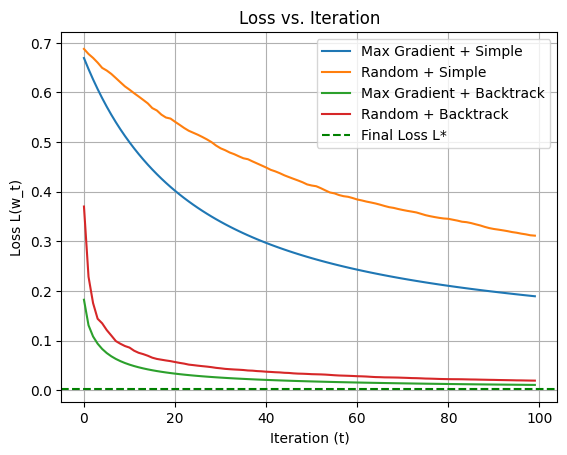

In [37]:
iterations = range(100)
plt.plot(iterations, losses_cd, label = 'Max Gradient + Simple')
plt.plot(iterations, losses_cd2, label = 'Random + Simple')
plt.plot(iterations, losses_cd3, label = 'Max Gradient + Backtrack')
plt.plot(iterations, losses_cd4, label = 'Random + Backtrack')
plt.axhline(y=Lstar, color='green', linestyle='--', label='Final Loss L*')
plt.xlabel('Iteration (t)')
plt.ylabel('Loss L(w_t)')
plt.title('Loss vs. Iteration')
plt.legend()
plt.grid(True)
plt.show()